# Hypothesis Testing Example 1

In [2]:
import pandas as pd

df = pd.read_csv('lab7_grades.csv')

In [3]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,55:34.3,83.030552,22:58.9,67.164441,58:34.0,53.011553,21:24.7,47.710398,24:59.7,38.168318,31:15.9
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,57:44.4,86.290821,41:18.4,69.772657,54:55.9,55.098125,32:30.9,49.588313,26:39.3,44.629482,07:24.3
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,36:02.4,85.512541,39:44.4,68.410033,22:45.9,54.728026,41:50.7,49.255224,31:12.5,44.329701,24:42.8
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,50:39.8,68.824532,20:38.7,61.942079,47:16.3,49.553663,09:20.5,49.553663,51:18.0,44.598297,09:12.1
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,06:10.8,51.491040,25:12.1,41.932832,25:22.6,36.929549,29:55.9,33.236594,46:06.6,33.236594,06:59.5


In [4]:
len(df)

1844

In [5]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [6]:
early.mean()

assignment1_grade    74.197438
assignment2_grade    66.525946
assignment3_grade    60.673154
assignment4_grade    53.994055
assignment5_grade    48.463647
assignment6_grade    43.611403
dtype: float64

In [7]:
late.mean()

assignment1_grade    74.981042
assignment2_grade    67.546186
assignment3_grade    61.167494
assignment4_grade    54.653772
assignment5_grade    49.166860
assignment6_grade    44.407458
dtype: float64

In [8]:
from scipy import stats
stats.ttest_ind?

stats.ttest_ind calculate the T-test for the means of *two independent* samples of scores.

The results are the statistic which is the calculated t-statistic.
and pvalue which is the two-tailed p-value.

In [9]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=-0.9803827780692735, pvalue=0.3270259517823427)

In [18]:
early = df[df['assignment2_submission'] <= '2015-12-31']
late = df[df['assignment2_submission'] > '2015-12-31']

early.mean()


assignment1_grade    73.561029
assignment2_grade    66.209669
assignment3_grade    60.519825
assignment4_grade    53.829178
assignment5_grade    48.347947
assignment6_grade    43.618135
dtype: float64

In [19]:
late.mean()


assignment1_grade    75.305191
assignment2_grade    67.698637
assignment3_grade    61.241927
assignment4_grade    54.732759
assignment5_grade    49.220318
assignment6_grade    44.397482
dtype: float64

In [20]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=-1.8921893743499618, pvalue=0.05862252995437909)

In [21]:
early = df[df['assignment3_submission'] <= '2015-12-31']
late = df[df['assignment3_submission'] > '2015-12-31']

early.mean()

assignment1_grade    74.707501
assignment2_grade    66.950255
assignment3_grade    60.778548
assignment4_grade    53.978108
assignment5_grade    48.723701
assignment6_grade    43.852675
dtype: float64

In [22]:
late.mean()

assignment1_grade    74.717290
assignment2_grade    67.284443
assignment3_grade    61.078040
assignment4_grade    54.592056
assignment5_grade    48.999058
assignment6_grade    44.237060
dtype: float64

In [23]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=-0.36636314806793496, pvalue=0.7141362121912675)

Continue Testing the remaining assignment and report on the discussion forum your findings

# Hypothesis Testing Example 2
Hypothesis: The coin is biased.
Formally,  H0
 : A coin is not biased. In other words:  X 
 Binomial(n, 0.5)
We want to be 95% sure we can reject  H0
 . We can flip the coin 1,000 and make sure it falls in the middle 95% of a binomial pmf.

In [26]:
import scipy.stats as ss
import numpy as np

#We plan to try 1000 tosses:
n_tosses = 100

#Let's find the middle 95% range:
lower_bound = ss.binom.ppf(0.025, n_tosses, 0.16) ##ppf (Percent point function) is inverse cdf (takes percentile, returns x (i.e. count))
upper_bound = ss.binom.ppf(0.975, n_tosses, 0.16)
print ("We want a count outside [%d, %d] to reject the null" % (lower_bound, upper_bound))

#now let's flip a coin
def coin_flip():
    return 1 if np.random.rand() < 0.25 else 0 #CHANGE THE COIN BIAS HERE


observed_head_count = np.sum([coin_flip() for _ in range(n_tosses)])#assume we took this from the real world...

print ("After %d tosses, we ended up with a count of %d" % (n_tosses, observed_head_count))
if observed_head_count >= lower_bound and observed_head_count <= upper_bound:
        print ("Failed to reject the null!")
else:
        print ("Null rejected!")

We want a count outside [9, 23] to reject the null
After 100 tosses, we ended up with a count of 17
Failed to reject the null!


# Hypothesis Testing Example 3
Hypothesis to test: Model whether a county was ranked based on its population.

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt

In [28]:
file = 'lab7_CHR_Analytic_Data.csv'
if (len(sys.argv) > 1) and (sys.argv[1][-4:].lower() == 'csv'):
    file = sys.argv[1]
print ("loading %s" % file)
data = pd.read_csv(file,sep=',',low_memory=False)

loading lab7_CHR_Analytic_Data.csv


Print COLUMN HEADERS
filter data frame to only county rows (those with countycode 
#filter to "value" columns
drop the non-value columns

In [29]:
valsColumn = [ currColumn for currColumn in data.columns if "Value" in currColumn
    or "COUNTYCODE" in currColumn or "County" in currColumn]
data = data[data.COUNTYCODE != 0] 
data = data[valsColumn]
valsColumn = [v for v in valsColumn if "Value" in v]

print ("\n(2) TOTAL COUNTIES IN FILE:")
print("\t\t\t\t%d "%(len(data.index)))


(2) TOTAL COUNTIES IN FILE:
				3141 


In [30]:
print (valsColumn)

['Premature death Value', 'Poor or fair health Value', 'Poor physical health days Value', 'Poor mental health days Value', 'Low birthweight Value', 'Adult smoking Value', 'Adult obesity Value', 'Food environment index Value', 'Physical inactivity Value', 'Access to exercise opportunities Value', 'Excessive drinking Value', 'Alcohol-impaired driving deaths Value', 'Sexually transmitted infections Value', 'Teen births Value', 'Uninsured Value', 'Primary care physicians Value', 'Dentists Value', 'Mental health providers Value', 'Preventable hospital stays Value', 'Diabetic screening Value', 'Mammography screening Value', 'High school graduation Value', 'Some college Value', 'Unemployment Value', 'Children in poverty Value', 'Income inequality Value', 'Children in single-parent households Value', 'Social associations Value', 'Violent crime Value', 'Injury deaths Value', 'Air pollution - particulate matter Value', 'Drinking water violations Value', 'Severe housing problems Value', 'Driving 

TOTAL RANKED COUNTIES: The total number of counties without a “1” in the field “County that was not ranked”

In [31]:
notRankedCounties = [ idx for idx,isRanked in enumerate(data['County that was not ranked']) if isRanked==1 ]
rankedCounties = [ idx for idx,isRanked in enumerate(data['County that was not ranked']) if isRanked!=1 ]
print("\n(3) TOTAL RANKED COUNTIES:")
print("\t\t\t\t%d "%(len(rankedCounties)))


(3) TOTAL RANKED COUNTIES:
				3062 


  
HISTOGRAM OF POPULATION: histpop.png: 
#A histogram of the field “'2011 population estimate Value'”. Choose an appropriate number of bins


In [32]:

if data['2011 population estimate Value'].dtype != 'int':
    data['2011 population estimate Value'] = data['2011 population estimate Value'].apply(lambda val: int(str.replace(val,',',''))) #make sure all ints
    data['2011 population estimate Value'] = data['2011 population estimate Value'].astype('int')

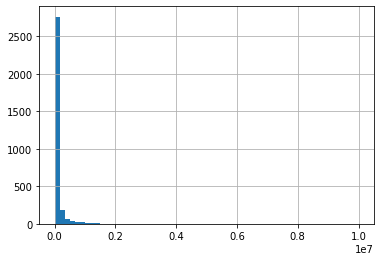

In [33]:
png_file = 'histpop.png'
hist = data['2011 population estimate Value'].hist(bins=60)
hist.get_figure().savefig(png_file)
plt.show()

## HISTOGRAM OF LOG POPULATION: histlog.png: Add a column, “log_pop” = log(“2011 population value”). 
(Side-note: log transforming the data makes it easier to model.)


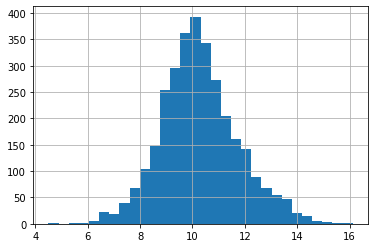

In [34]:
png_file = 'histlog.png'
data['log_pop'] = np.log(data['2011 population estimate Value'])
lhist = data['log_pop'].hist(bins=30)
lhist.get_figure().savefig(png_file)
plt.show()

## KERNEL DENSITY ESTIMATES: KDE.png: 2 kernel density plots based on log_pop: (a) counties not ranked, and (b) counties ranked. Overlay the density plots over each other into a single graph. Zoom in if necessary to see the the non-ranked distribution clearly. 

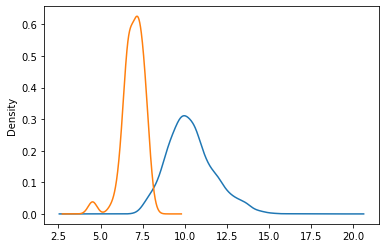

In [36]:
png_file = 'KDE.png'
dataRanked = data.iloc[rankedCounties]
dataNotRanked = data.iloc[notRankedCounties]
dataRanked['log_pop'].plot(kind='kde')
kde = dataNotRanked['log_pop'].plot(kind='kde')
kde.get_figure().savefig(png_file)
plt.show()

## PROBABILITY RANKED GIVEN POP: Three probabilities 
    --The estimated probability that an unseen county would be ranked, 
     given the following (non-logged) populations: 300, 3100, 5000. 

In [37]:
def probGivenPop (RPOP_data, NRPOP_data, log_pop):
    """#Approach: The two sets of data (ranked counties and not ranked) can be modeled as normal CRVs: RPOP and NRPOP
       while the question is asking about something being true (i.e. a Bernoulli): P(ranked | pop)
       where pop is population of the given county
       P(RPOP = pop) = 0 and P(RPOP = pop) = 0, since they are CRVs, but we can simply add an interval
       in order to get non-zero values. 
       Then, we can look at the ratio of P(pop -.5 < RPOP < pop + .5) to P(pop -.5 < NRPOP < pop + .5)
       and normalize by the total count of each. (we will work with everything logged)"""
    
    #first we compute the probabilities under each population 
    bw = .5 #bandwidth for estimates
    P_RPOP = ss.norm.cdf(log_pop+bw, RPOP_data.mean(), RPOP_data.std()) - \
        ss.norm.cdf(log_pop-bw, RPOP_data.mean(), RPOP_data.std())#probability among ranked
    P_NRPOP = ss.norm.cdf(log_pop+bw, NRPOP_data.mean(), NRPOP_data.std()) - \
        ss.norm.cdf(log_pop-bw, NRPOP_data.mean(), NRPOP_data.std())#probability among not ranked
    
    #next normalize by population of each to get an estimated number of counties with each population:
    Est_Counties_Ranked_at_pop = P_RPOP * len(RPOP_data)
    Est_Counties_NotRanked_at_pop = P_NRPOP * len(NRPOP_data)
    
    #finally compute the probability: counties ranked / all counties (in the given population)
    return Est_Counties_Ranked_at_pop / (Est_Counties_Ranked_at_pop + Est_Counties_NotRanked_at_pop)

print ("\t 300: %.4f" % probGivenPop(dataRanked['log_pop'], dataNotRanked['log_pop'], np.log(300)))
print ("\t 3100: %.4f" % probGivenPop(dataRanked['log_pop'], dataNotRanked['log_pop'], np.log(3100)))
print ("\t 5000: %.4f" % probGivenPop(dataRanked['log_pop'], dataNotRanked['log_pop'], np.log(5000)))


	 300: 0.3096
	 3100: 0.9426
	 5000: 0.9901


## Model the health scores as normal. As in (1), consider each column ending in “Value”. 


## LIST MEAN AND STD_DEV PER COLUMN: 
    For each value column, output it’s mean and standard deviation according to MLE, 
    assuming a normal distribution (pprint a dictionary of {column: (mean, std-dev), … }).

In [52]:
print ("\n LIST MEAN AND STD_DEV PER COLUMN:")
mean_sd = data[valsColumn].describe()[1:3] ## returns mean and std only, other describe output is ignored
mean_sd_dict = dict([(c, (round(mean_sd[c]['mean'], 4), round(mean_sd[c]['std'], 4), )) for c in mean_sd.columns])
from pprint import pprint
pprint(mean_sd_dict)


 LIST MEAN AND STD_DEC PER COLUMN:
{'2011 population estimate Value': (100645.9214, 322424.2818),
 'Access to exercise opportunities Value': (0.6249, 0.2296),
 'Adult obesity Value': (0.3069, 0.0434),
 'Adult smoking Value': (0.2128, 0.0631),
 'Air pollution - particulate matter Value': (11.6239, 1.5268),
 'Alcohol-impaired driving deaths Value': (0.316, 0.1595),
 'Child mortality Value': (63.2684, 26.1049),
 'Children eligible for free lunch Value': (0.4337, 0.1725),
 'Children in poverty Value': (0.2458, 0.0956),
 'Children in single-parent households Value': (0.3212, 0.1038),
 'Could not see doctor due to cost Value': (0.1536, 0.0557),
 'Dentists Value': (41.6348, 26.7767),
 'Diabetes Value': (0.1098, 0.0231),
 'Diabetic screening Value': (0.8425, 0.0649),
 'Drinking water violations Value': (0.0918, 0.1708),
 'Driving alone to work Value': (0.7865, 0.0776),
 'Drug poisoning deaths Value': (14.1969, 7.758),
 'Excessive drinking Value': (0.1651, 0.0517),
 'Food environment index Val

In [42]:
#since we're about to use numbers in every value column, let's make sure we're dealing with types where means can be computed
for c in valsColumn:
    if not (data[c].dtype == np.float64 or data[c].dtype == np.int64):
        data[c] = data[c].apply(lambda val: float(str.replace(str(val),',',''))) ##change to string then floats... 
        data[c] = data[c].astype('float')

PSEUDO-POP-DEPENDENT COLUMNS:
List of columns which appear to be dependent on log_pop.  
For the purposes of this exercise, we will call two continuous random variables, 
A and B “pseodo-independent” iff  | E(A| B<muB) - E(A| B>muB) | < 0.5*sigmaA.  

In [43]:
print ("\n PSEUDO_POP_DEPENDENT COLUMNS:")
# Let's designate population as variable B, and every other value column as A
# frist find where B<muB and B>muB:
dataLt = data[data['log_pop']  < data['log_pop'].mean()]
dataGt = data[data['log_pop']  > data['log_pop'].mean()]

#now iterate through each potential A (value column) and test if pseudo-independent
dep_cols = list()
for c in valsColumn:
    expected_diff = np.abs(dataLt[c].mean() - dataGt[c].mean()) # | E(A| B<muB) - E(A| B>muB) |
    if expected_diff > 0.5*data[c].std(): #greater than because we're looking for dependent
        dep_cols.append(c)
        
print (sorted(dep_cols))


 PSEUDO_POP_DEPENDENT COLUMNS:
['2011 population estimate Value', 'Access to exercise opportunities Value', 'Child mortality Value', 'Dentists Value', 'Drug poisoning deaths Value', 'Homicide rate Value', 'Infant mortality Value', 'Injury deaths Value', 'Mammography screening Value', 'Median household income Value', 'Motor vehicle crash deaths Value', 'Physical inactivity Value', 'Population living in a rural area Value', 'Primary care physicians Value', 'Severe housing problems Value', 'Social associations Value', 'Some college Value', 'Uninsured children Value', 'Violent crime Value']


## Hypothesis Testing Example 4: 
Hypothesis to test: Communities with higher population have different amounts of violent crimes (per capita) than those with lower population.

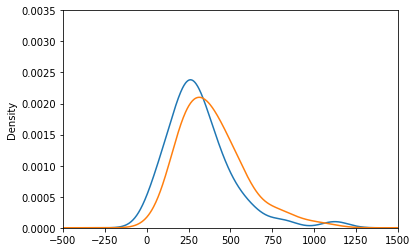

In [66]:
# Going back to the County Health Rankings data: 
#dataLt is data for the counties with the lowest half of population
#dataGt is data for greatest population

#let's zoom in on Violent crime and remove nans  (not a number / nulls)
dataLtVC = dataLt['Violent crime Value'][~dataLt['Violent crime Value'].isnull()][:100] #or .dropna()
dataGtVC = dataGt['Violent crime Value'][~dataGt['Violent crime Value'].isnull()][:100]
dataVC = pd.concat([dataLtVC, dataGtVC])

#let's see as a kde:
dataLtVC.plot(kind='kde')
dataGtVC.plot(kind='kde')
plt.axis([-500,1500,0,0.0035]) #zoom in to these dimensions
plt.show()


## Using a t-test to compare means

In [69]:
##gather means, ns, and standard deviation:
mean1, mean2 = dataLtVC.mean(), dataGtVC.mean()
sd1, sd2 = dataLtVC.std(), dataGtVC.std() #standard deviation across both
n1, n2 = len(dataLtVC), len(dataGtVC)
df1, df2 = (n1 - 1), (n2 - 1)
print ("Mean of lower 50%%: %.1f (%d) \nMean of upper 50%%: %.1f (%d) \n " % (mean1, n1, mean2, n2))

##two sample t-test, assuming equal variance:
pooled_var = (df1*sd1**2 + df2*sd2**2) / (df1 + df2) #pooled variance
t = (mean1 - mean2) / np.sqrt(pooled_var * (1.0/n1 + 1.0/n2)) 
print (t)
p = 1 - ss.t.cdf(np.abs(t), df1+df2)
print ("t: %.4f, df: %.1f, p: %.5f" % (t, df1+df2, p)) #one tail (if you hypothesize)
print ('t-statistic = %6.3f pvalue = %6.4f' %  ss.ttest_ind(dataLtVC, dataGtVC)) #two tails

Mean of lower 50%: 318.1 (100) 
Mean of upper 50%: 407.6 (100) 
 
-2.8980648960398296
t: -2.8981, df: 198.0, p: 0.00209
t-statistic = -2.898 pvalue = 0.0042


## shape of a student's t distribution

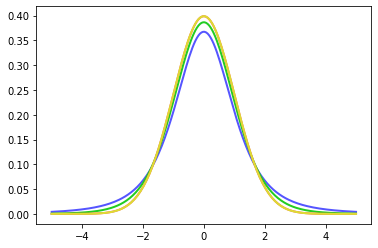

In [70]:
##what does a t distribution look like?
xpoints = np.linspace(-5, 5, 200)
y_3df = ss.t.pdf(xpoints, 3)
y_6df = ss.t.pdf(xpoints, 8)
y_bigdf = ss.t.pdf(xpoints, 1000)
plt.plot(xpoints, y_3df, linewidth=2, color='#5555ff')#blue
plt.plot(xpoints, y_6df, linewidth=2, color='#22cc22')#green
plt.plot(xpoints, y_bigdf, linewidth=2, color='#ff5555')#red

##how does it compare to a normal?
y_znormal = ss.norm.pdf(xpoints, 0, 1)
plt.plot(xpoints, y_znormal, linewidth=2, color='#dddd33')#yellow

## Linear Regression

yhat = beta0 + beta1*x = -253.33 + 48.65x


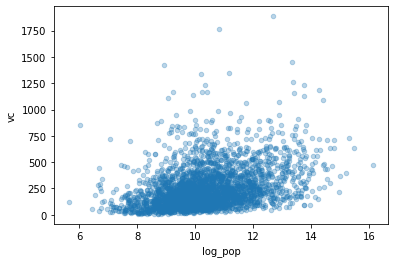

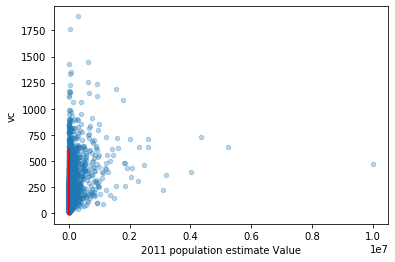

In [74]:
#let's get back to working with the original data
data = data[~data['Violent crime Value'].isnull()]#drop nas
data = data[data['Violent crime Value']!=0]#drop zeros
data['vc']= data['Violent crime Value']

#let's just see how this data lays out:
data.plot(kind='scatter', x = 'log_pop', y='vc', alpha=0.3)

#if we wanted to see the scatter without logging population:
data.plot(kind='scatter', x = '2011 population estimate Value', y='vc', alpha=0.3)

##if we want to have scipy figure out the regression coefficients:
beta1, beta0, r, p, stderr = ss.linregress(data['log_pop'], data['vc'])# we will talk about r, p, and stderr next
#(assume beta1 and beta0 are estimate; i.e. beta1hat, beta0hat; we will almost never know non-estimated betas)
print ("yhat = beta0 + beta1*x = %.2f + %.2fx" % (beta0, beta1))
#now plot the line:
xpoints = np.linspace(data['log_pop'].min()*.90, data['log_pop'].max()*1.1, 100)
plt.plot(xpoints, beta0 + beta1*xpoints, color='red', linewidth=2) #note: "beta0 + beta1*xpoints" is using vector algebra

## Matrix Linear Algebra Functions

In [76]:
X1 = np.array([[1, 2, 3],[4, 5 ,6]])
X2 = np.array([[1, 2],[3, 4], [5, 6]])
X1X2 = np.dot(X1, X2) # dot product multiplication
print (X1X2)
X1X1t = np.dot(X1, np.transpose(X1))#transpose
print (X1X1t)
X1X1t_inv = np.linalg.inv(X1X1t) #matrix inversion: X^{-1}
print (X1X1t_inv)

[[22 28]
 [49 64]]
[[14 32]
 [32 77]]
[[ 1.42592593 -0.59259259]
 [-0.59259259  0.25925926]]


before logging VC; r = 0.354, p = 0.00000


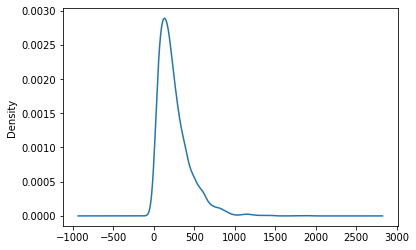

after logging VC; r = 0.400, p = 0.00000


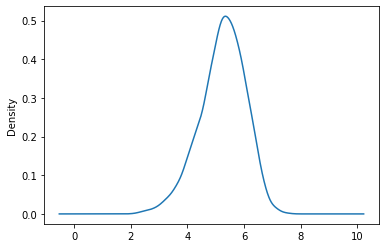

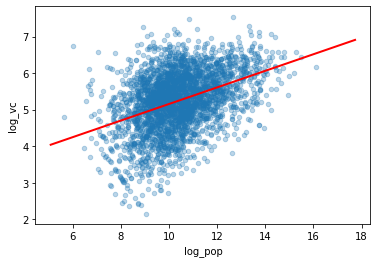

from linregress: r = 0.400, p = 0.00000


In [77]:
#back to regressoin: 
#good to transform vc to be more normal

#before transform
data['vc'].plot(kind='kde') 
print ("before logging VC; r = %.3f, p = %.5f" % ss.pearsonr(data['log_pop'], data['vc']))
plt.show()
data['log_vc'] = np.log(data['vc']+1)
data['log_vc'].plot(kind='kde')#after transform
print ("after logging VC; r = %.3f, p = %.5f" % ss.pearsonr(data['log_pop'], data['log_vc']))

data.plot(kind='scatter', x = 'log_pop', y='log_vc', alpha=0.3)
beta1, beta0, r, p, stderr = ss.linregress(data['log_pop'], data['log_vc'])# we will talk about r, p, and stderr next
xpoints = np.linspace(data['log_pop'].min()*.90, data['log_pop'].max()*1.1, 100)
plt.plot(xpoints, beta0 + beta1*xpoints, color='red', linewidth=2) #note: "beta0 + beta1*xpoints" is using vector algebra
plt.show()
print ("from linregress: r = %.3f, p = %.5f" % (r, p))

#note that the red line has a steeper slope now => greater r

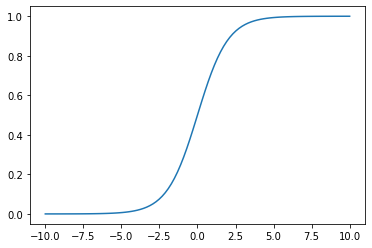

In [78]:
def logistic_function(x):
    return np.exp(x) / (1+np.exp(x))

xpoints = np.linspace(-10, 10, 100)
plt.plot(xpoints, [logistic_function(x) for x in xpoints])